- splitNum=10, K-means vocab size=256 파일을 사용
- input training, testing set을 quantization한 것을 저장해두고, 모든 실험에서 돌려썼기에 이로 인한 영향은 없음

In [1]:
import sys
import os
sys.path.append('../')

from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
from mpl_toolkits.mplot3d import Axes3D

In [241]:
# Load the .mat file
data = io.loadmat('.././RF_code/result/two-pixel/result_8_6.mat')

# Extract required data
test_accuracy = data['results']['num_depth_testaccuracy'][0, 0]
train_accuracy = data['results']['num_depth_trainaccuracy'][0, 0]
train_time = data['results']['num_depth_train_time'][0, 0]
test_time = data['results']['num_depth_test_time'][0, 0]
tree_nums = [1,5,10,25,50,100,250,500]
tree_depths = [2, 4, 6, 8, 10, 12]

In [242]:
gt_label = np.array([i for i in range(1, 11) for _ in range(15)])

temp1 = data['results']['best_test_result'][0, 0]
temp2 = data['results']['best_train_result'][0, 0]

temp1 = temp1['num_250_depth_10'][0, 0].flatten()
temp2 = temp2['num_250_depth_10'][0, 0].flatten()
#print(temp1)
#print(temp2)

print("Best test accuracy: ", np.mean(gt_label == temp1))

Best test accuracy:  0.7333333333333333


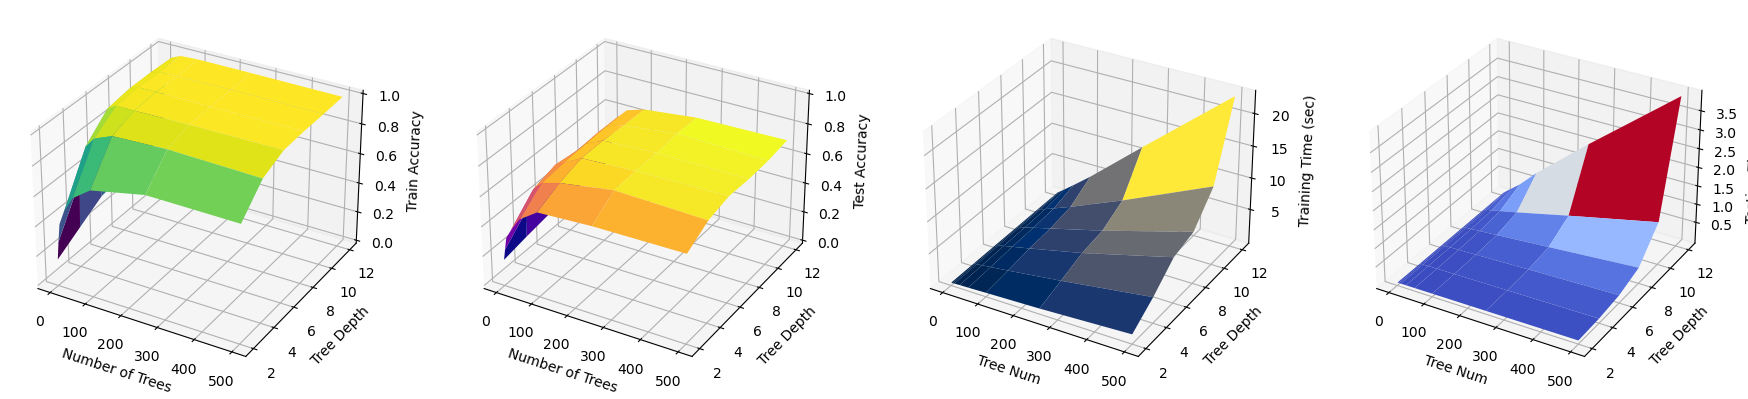

In [243]:
fig = plt.figure(figsize=(18, 4))
X, Y = np.meshgrid(tree_nums, tree_depths)

# 1. Train Accuracy plot
ax = fig.add_subplot(141, projection='3d')
ax.plot_surface(X, Y, train_accuracy.T, cmap='viridis')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Train Accuracy')
ax.set_zlim(0.0, 1.0)

# 2. Test Accuracy plot
ax = fig.add_subplot(142, projection='3d')
ax.plot_surface(X, Y, test_accuracy.T, cmap='plasma')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Test Accuracy')
ax.set_zlim(0.0, 1.0)

# 3. Train time plot
ax = fig.add_subplot(143, projection='3d')
ax.plot_surface(X, Y, train_time.T, cmap='cividis')
ax.set_xlabel('Tree Num')
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Training Time (sec)')
#z_lim = ax.get_zlim()

# 4. Test time plot
ax = fig.add_subplot(144, projection='3d')
ax.plot_surface(X, Y, test_time.T, cmap='coolwarm')
ax.set_xlabel('Tree Num')
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Testing Time (sec)')
#ax.set_zlim(z_lim)

plt.tight_layout()
# plt.savefig('.././report/image/q2-fig1', dpi=300)

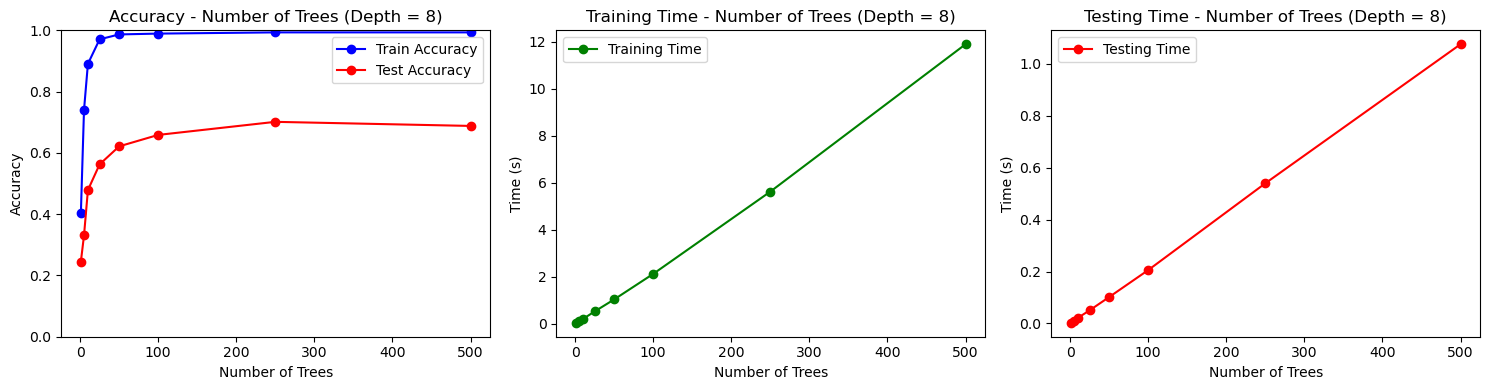

In [72]:
# Find the index of depth 10
depth_idx = tree_depths.index(10)

# Extract data for fixed depth of 10
train_accuracy_fixed_depth = train_accuracy[:, depth_idx]
test_accuracy_fixed_depth = test_accuracy[:, depth_idx]
train_time_fixed_depth = train_time[:, depth_idx]
test_time_fixed_depth = test_time[:, depth_idx]

# Plot accuracy vs number of trees
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot accuracy
axs[0].plot(tree_nums, train_accuracy_fixed_depth, '-o', color='b', label='Train Accuracy')
axs[0].plot(tree_nums, test_accuracy_fixed_depth, '-o', color='r', label='Test Accuracy')
axs[0].set_title('Accuracy - Number of Trees (Depth = 8)')
axs[0].set_xlabel('Number of Trees')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].axis(ymin=0.0,ymax=1.0)

# Plot train and test time in the same graph
axs[1].plot(tree_nums, train_time_fixed_depth, '-o', color='g', label='Training Time')
axs[1].set_title('Training Time - Number of Trees (Depth = 8)')
axs[1].set_xlabel('Number of Trees')
axs[1].set_ylabel('Time (s)')
axs[1].legend()

axs[2].plot(tree_nums, test_time_fixed_depth, '-o', color='r', label='Testing Time')
axs[2].set_title('Testing Time - Number of Trees (Depth = 8)')
axs[2].set_xlabel('Number of Trees')
axs[2].set_ylabel('Time (s)')
axs[2].legend()

plt.tight_layout()
# plt.savefig('.././report/image/q2-fig2', dpi=300)

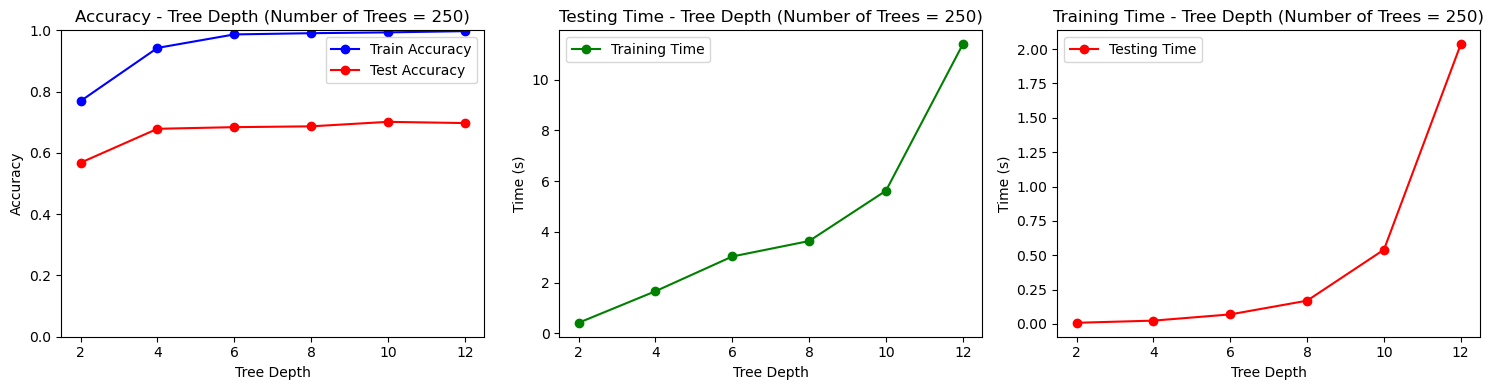

In [ ]:
# Find the index of 250 trees
num_trees_idx = tree_nums.index(250)

# Extract data for fixed number of trees = 250
train_accuracy_fixed_depth = train_accuracy[num_trees_idx, :]
test_accuracy_fixed_depth = test_accuracy[num_trees_idx, :]
train_time_fixed_depth = train_time[num_trees_idx, :]
test_time_fixed_depth = test_time[num_trees_idx, :]

# Plot accuracy vs tree depth
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot accuracy
axs[0].plot(tree_depths, train_accuracy_fixed_depth, '-o', color='b', label='Train Accuracy')
axs[0].plot(tree_depths, test_accuracy_fixed_depth, '-o', color='r', label='Test Accuracy')
axs[0].set_title('Accuracy - Tree Depth (Number of Trees = 250)')
axs[0].set_xlabel('Tree Depth')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].axis(ymin=0.0,ymax=1.0)

# Plot train and test time in the same graph
axs[1].plot(tree_depths, train_time_fixed_depth , '-o', color='g', label='Training Time')
axs[1].set_title('Testing Time - Tree Depth (Number of Trees = 250)')
axs[1].set_xlabel('Tree Depth')
axs[1].set_ylabel('Time (s)')
axs[1].legend()

axs[2].plot(tree_depths, test_time_fixed_depth , '-o', color='r', label='Testing Time')
axs[2].set_title('Training Time - Tree Depth (Number of Trees = 250)')
axs[2].set_xlabel('Tree Depth')
axs[2].set_ylabel('Time (s)')
axs[2].legend()

plt.tight_layout()
#plt.savefig('.././report/image/q2-fig3', dpi=300)

In [ ]:
# Load the .mat file
data = io.loadmat('.././RF_code/result/two-pixel/result_500.mat')
results = data['results']

# Selected_indices
idx = [0,5,7,9,10,11,12]

# Extract required data
test_accuracy = data['results']['num_depth_testaccuracy'][0, 0].flatten()[idx]
train_accuracy = data['results']['num_depth_trainaccuracy'][0, 0].flatten()[idx]
train_time = data['results']['num_depth_train_time'][0, 0].flatten()[idx]
test_time = data['results']['num_depth_test_time'][0, 0].flatten()[idx]
splitnum_list = data['results']['splitNum'][0, 0].flatten()[idx]

In [218]:
print(splitnum_list)

best_result = []
worst_result = []
best_data = data['results']['best_test_result'][0, 0]
worst_data = data['results']['worst_test_result'][0, 0]
for i in range (len(splitnum_list)):
    name = "split_" + str(splitnum_list[i])
    temp_best = best_data[name][0, 0].flatten()
    temp_worst = worst_data[name][0, 0].flatten()

    best_result.append(np.mean(gt_label == temp_best))
    worst_result.append(np.mean(gt_label == temp_worst))

print("Best test accuracy: ", best_result)
print("Avg test accuracy: ", test_accuracy)
print("Worst test accuracy: ", worst_result)

[  1  10  30  50 100 250 500]
Best test accuracy:  [0.7266666666666667, 0.7066666666666667, 0.7066666666666667, 0.68, 0.6866666666666666, 0.6866666666666666, 0.6733333333333333]
Avg test accuracy:  [0.68533333 0.68533333 0.676      0.67333333 0.65866667 0.672
 0.64266667]
Worst test accuracy:  [0.6533333333333333, 0.66, 0.6533333333333333, 0.6666666666666666, 0.6333333333333333, 0.6533333333333333, 0.6133333333333333]


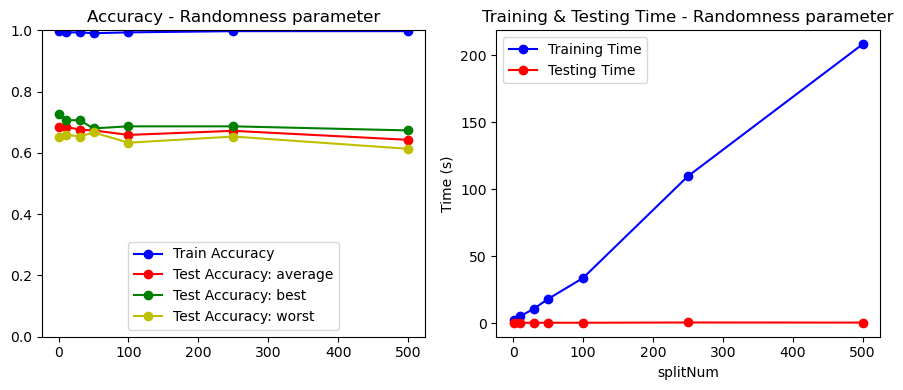

In [ ]:
# Plot accuracy vs number of trees
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Plot Accuracy for Splitnum
axs[0].plot(splitnum_list, train_accuracy, '-o', color='b', label='Train Accuracy')
axs[0].plot(splitnum_list, test_accuracy, '-o', color='r', label='Test Accuracy: average')
axs[0].plot(splitnum_list, best_result, '-o', color='g', label='Test Accuracy: best')
axs[0].plot(splitnum_list, worst_result, '-o', color='y', label='Test Accuracy: worst')
axs[0].set_title('Accuracy - Randomness parameter')
plt.xlabel('splitNum')
plt.ylabel('Accuracy')
axs[0].legend(loc='lower center')
axs[0].axis(ymin=0.0,ymax=1.0)

# Plot Training and Testing Time for Splitnum
axs[1].plot(splitnum_list, train_time, '-o', color='b', label='Training Time')
axs[1].plot(splitnum_list, test_time, '-o', color='r', label='Testing Time')
axs[1].set_title('Training & Testing Time - Randomness parameter')
axs[1].set_xlabel('splitNum')
axs[1].set_ylabel('Time (s)')
axs[1].legend()

plt.tight_layout()
#plt.savefig('.././report/image/q2-fig4', dpi=300)

In [244]:
# Load the .mat file
data = io.loadmat('.././RF_code/result/two-pixel/result_1024.mat')
results = data['results']

# Extract required data
test_accuracy = data['results']['num_depth_testaccuracy'][0, 0].flatten()
train_accuracy = data['results']['num_depth_trainaccuracy'][0, 0].flatten()
train_time = data['results']['num_depth_train_time'][0, 0].flatten()
test_time = data['results']['num_depth_test_time'][0, 0].flatten()
vocab_list = data['results']['vocabSize'][0, 0].flatten()

In [245]:
# underfit / overfit check
print(train_accuracy)
print(test_accuracy)

# result: train accuracy는 점점 상승하지만, test accuracy가 512 지점에서 drop됨을 확인

[0.56133333 0.796      0.92933333 0.94933333 0.98133333 0.98533333
 0.99066667 0.99333333 1.         1.        ]
[0.24133333 0.35066667 0.472      0.60133333 0.62933333 0.65733333
 0.66933333 0.69333333 0.69733333 0.68533333]


(-49.1, 1075.1, 0.0, 1.0)

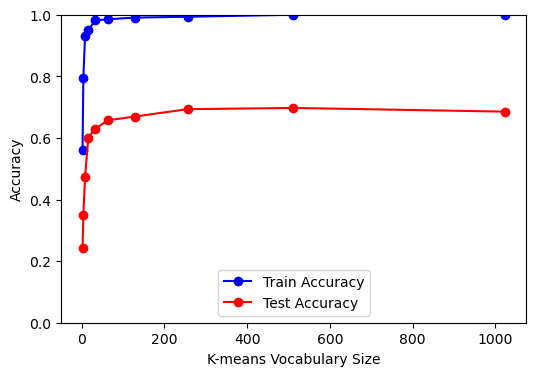

In [246]:
# Plot accuracy vs number of trees
plt.figure(figsize=(6, 4))

# Plot Accuracy for Splitnum
plt.plot(vocab_list, train_accuracy, '-o', color='b', label='Train Accuracy')
plt.plot(vocab_list, test_accuracy, '-o', color='r', label='Test Accuracy')

plt.xlabel('K-means Vocabulary Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower center')
plt.axis(ymin=0.0,ymax=1.0)

# plt.savefig('.././report/image/q2-two-pixel/q2-fig5', dpi=300)

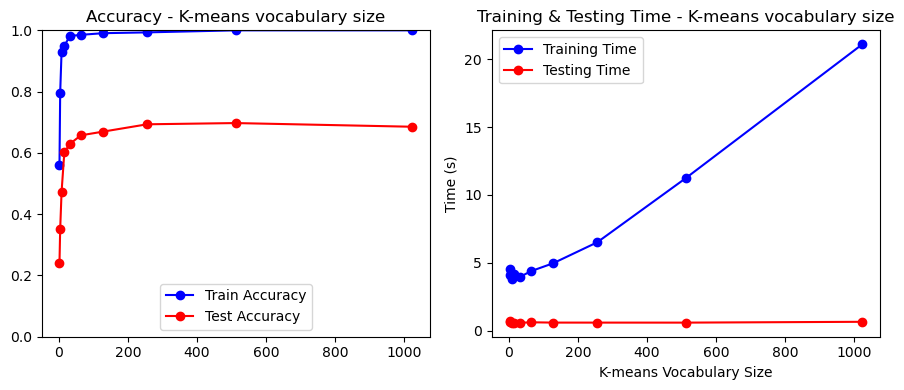

In [236]:
# Plot accuracy vs number of trees
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Plot Accuracy for Splitnum
axs[0].plot(vocab_list, train_accuracy, '-o', color='b', label='Train Accuracy')
axs[0].plot(vocab_list, test_accuracy, '-o', color='r', label='Test Accuracy')

axs[0].set_title('Accuracy - K-means vocabulary size')
plt.xlabel('K-means Vocabulary Size')
plt.ylabel('Accuracy')
axs[0].legend(loc='lower center')
axs[0].axis(ymin=0.0,ymax=1.0)

# Plot Training and Testing Time for Splitnum
axs[1].plot(vocab_list, train_time, '-o', color='b', label='Training Time')
axs[1].plot(vocab_list, test_time, '-o', color='r', label='Testing Time')
axs[1].set_title('Training & Testing Time - K-means vocabulary size')
axs[1].set_xlabel('K-means Vocabulary Size')
axs[1].set_ylabel('Time (s)')
axs[1].legend()

plt.tight_layout()
#plt.savefig('.././report/image/q2-fig4', dpi=300)